In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages
from keras.layers import Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd

import tensorflow as tf
import keras

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
# visualization
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

def myscatter(Y, class_idxs, legend=False, ran=True, seed=229):
    if ran:
        np.random.seed(seed)
    Y = np.array(Y)
    fig, ax = plt.subplots(figsize=(6,4), dpi=300)
    classes = list(np.unique(class_idxs))
    markers = 'osD' * len(classes)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))
    if ran:
        np.random.shuffle(colors)

    for i, cls in enumerate(classes):
        mark = markers[i]
        ax.plot(Y[class_idxs == cls, 0], Y[class_idxs == cls, 1], marker=mark,
                linestyle='', ms=4, label=str(cls), alpha=1, color=colors[i],
                markeredgecolor='black', markeredgewidth=0.15)
    if legend:
        ax.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0, fontsize=10, markerscale=2, frameon=False,
                  ncol=2, handletextpad=0.1, columnspacing=0.5)

    plt.xticks([])
    plt.yticks([])

    return ax

In [ ]:
# t-SNE
def tsne(X, dim=2, ran=23):
    t_sne = TSNE(n_components=dim, random_state=ran)
    Y_tsne = t_sne.fit_transform(X)
    return Y_tsne

In [ ]:
!pip install phenograph

In [ ]:
!pip install scanpy

In [ ]:
# clustering layer

from tensorflow.keras import activations, constraints, initializers, regularizers
from tensorflow.keras.layers import Layer, InputSpec
import tensorflow.keras.backend as K
import phenograph
from sklearn.cluster import KMeans

class ClusteringLayer(Layer):
    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)
        self.n_clusters = n_clusters

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters', trainable=True)
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

def target_distribution(q):
    q = q.numpy()
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

def target_distribution(q):
    q = q.numpy()
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

def computeCentroids(data, labels):
    n_clusters = len(np.unique(labels))
    return np.array([data[labels == i].mean(0) for i in range(n_clusters)])

def get_centers(H, mode="kmeans", n_cluster=10):
    if mode == "louvain":
        l, _,  _ = phenograph.cluster(H)
    elif mode == "kmeans":
        l = KMeans(n_clusters=n_cluster, random_state=0).fit(h).labels_
    centers = computeCentroids(H, l)
    return centers, l

In [ ]:
# read data
cells_number = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML328-all_celltype_number.csv", index_col=0, sep="\t"))
count = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML328-all_normalize.csv", index_col=0, sep=","))

In [ ]:
# read data
cells_number = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML328-all_celltype_number.csv", index_col=0, sep="\t"))
cells = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML328-all_celltype_sample.csv", index_col=0, sep="\t"))
count = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML328-all_normalize.csv", index_col=0, sep=","))

In [ ]:
cells_number = np.array(pd.read_csv("/content/drive/My Drive/compbio/test_data/bm4/bm4_idents.csv", index_col=0, sep="\t"))
count = np.array(pd.read_csv("/content/drive/My Drive/compbio/test_data/bm4/bm4_raw.csv", index_col=0, sep="\t"))

In [ ]:
cells_number = np.array(pd.read_csv("/content/drive/My Drive/compbio/test_data/aml328/AML328_idents.csv", index_col=0, sep="\t"))
count = np.array(pd.read_csv("/content/drive/My Drive/compbio/test_data/aml328/AML328_all_data.csv", index_col=0, sep="\t"))

In [ ]:
cells_number = cells_number.flatten()

In [ ]:
count1 = count[cells_number == "lateEry", :]
count2 = count[cells_number == "T", :]
count3 = count[cells_number == "B", :]
count4 = count[cells_number == "Mono", :]
count5 = count[cells_number == "NK", :]
count6 = count[cells_number == "Plasma", :]
count7 = count[cells_number == "GMP", :]
count8 = count[cells_number == "Prog", :]

In [ ]:
cells1 = cells_number[cells_number == "lateEry"]
cells2 = cells_number[cells_number == "T"]
cells3 = cells_number[cells_number == "B"]
cells4 = cells_number[cells_number == "Mono"]
cells5 = cells_number[cells_number == "NK"]
cells6 = cells_number[cells_number == "Plasma"]
cells7 = cells_number[cells_number == "GMP"]
cells8 = cells_number[cells_number == "Prog"]

In [ ]:
count = np.concatenate([count1,count2,count3,count4,count5,count6,count7,count8],axis=0)
cells_number = np.concatenate([cells1,cells2,cells3,cells4,cells5,cells6,cells7,cells8],axis=0)

In [ ]:
cells_number

array(['lateEry', 'lateEry', 'lateEry', ..., 'Prog', 'Prog', 'Prog'],
      dtype=object)

In [ ]:
np.unique(cells_number)

array(['B', 'GMP', 'Mono', 'NK', 'Plasma', 'Prog', 'T', 'lateEry'],
      dtype=object)

In [ ]:
cells_number.shape

(5222,)

In [ ]:
count.shape

(5222, 3694)

In [ ]:
count.T

In [ ]:
# read data
cells_number = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML707B-all_celltype_number.csv", index_col=0, sep="\t"))
count = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML707B-all_normalize.csv", index_col=0, sep=","))

In [ ]:
count = np.array(pd.read_csv("AML-029-08-1E_data.csv", index_col=0, sep="\t"))

In [ ]:
# read data
cells = np.array(pd.read_csv("/content/drive/My Drive/CompBio/test_data/GSM3587969_AML707B-D0_info_new.csv", index_col=0, sep="\t"))
cells_number = np.array(pd.read_csv("/content/drive/My Drive/CompBio/test_data/GSM3587969_AML707B-D0_info_number.csv", index_col=0, sep="\t"))
count = np.array(pd.read_csv("/content/drive/My Drive/CompBio/test_data/GSM3587969_AML707B-D0_normalize.csv", index_col=0, sep=","))

In [ ]:
import scanpy as sc
import anndata as ad

In [ ]:
adata = ad.AnnData(count, dtype='float32')
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw=adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, subset=True)
adata = adata[:, adata.var['highly_variable']]

In [ ]:
count = adata.X

In [ ]:
# preprocessing
[n_sample, n_gene] = count.shape

x_train = count.astype('float32')
cells_number=cells_number.flatten()

In [ ]:
from tensorflow.keras.losses import MSE, KLD
from keras.constraints import NonNeg
class AE(tf.keras.Model):

    def __init__(self, X, hidden_dim=[], latent_dim=50, impute_dim=64):
        super(AE, self).__init__()
        self.X = X
        self.latent_dim = latent_dim

        # encoder
        
        #encoder_in = Input(shape=n_gene)
        #encoded1 = Dense(hidden_dim, activation = "relu", use_bias=True)(encoder_in)
        #encoded2 = Dense(latent_dim, activation = "relu", use_bias=True)(encoded1)
        #kernel_constraint=NonNeg(), 
        #kernel_initializer='glorot_uniform'
        
        encoder_in = Input(shape=n_gene)
        if len(hidden_dim) == 0:
            encoded = Dense(latent_dim, activation = "relu", use_bias=True)(encoder_in)
        elif len(hidden_dim) == 1:
            encoded = Dense(hidden_dim[0], activation = "relu", use_bias=True)(encoder_in)
            encoded = Dense(latent_dim, activation = "relu", use_bias=True)(encoded)
        elif len(hidden_dim) == 2:
            encoded = Dense(hidden_dim[0], activation = "relu", use_bias=True)(encoder_in)
            encoded = Dense(hidden_dim[1], activation = "relu", use_bias=True)(encoded)
            encoded = Dense(latent_dim, activation = "relu", use_bias=True)(encoded)
        else:
            encoded_list = []
            encoded = Dense(hidden_dim[0], activation = "relu", use_bias=True)(encoder_in)
            encoded_list.append(encoded)
            for i in range(1, len(hidden_dim)-1):
                encoded = Dense(hidden_dim[i], activation = "relu", use_bias=True)(encoded_list[i-1])
                encoded_list.append(encoded)
            encoded = Dense(latent_dim, activation = "relu", use_bias=True)(encoded_list[-1])
        encoder = Model(inputs=encoder_in, outputs=encoded, name="encoder")
    
        self.encoder = encoder
    
        # decoder
        
        #decoder_in = Input(shape=latent_dim)
        #decoded1 = Dense(hidden_dim, activation = "relu", use_bias=True)(decoder_in)
        #decoded2 = Dense(n_gene, activation = "relu", use_bias=True)(decoded1)
        #decoder = Model(inputs=decoder_in, outputs=decoded2, name="decoder")
        
        hidden_rev = hidden_dim[::-1]
        decoder_in = Input(shape=latent_dim)
        if len(hidden_dim) == 0:
            decoded = Dense(n_gene, activation = "relu", use_bias=True)(decoder_in)
        elif len(hidden_dim) == 1:
            decoded = Dense(hidden_rev[0], activation = "relu", use_bias=True)(decoder_in)
            decoded = Dense(n_gene, activation = "relu", use_bias=True)(decoded)
        elif len(hidden_dim) == 2:
            decoded = Dense(hidden_rev[0], activation = "relu", use_bias=True)(decoder_in)
            decoded = Dense(hidden_rev[1], activation = "relu", use_bias=True)(decoded)
            decoded = Dense(n_gene, activation = "relu", use_bias=True)(decoded)
        else:
            decoded_list = []
            decoded = Dense(hidden_rev[0], activation = "relu", use_bias=True)(decoder_in)
            decoded_list.append(decoded)
            for i in range(1, len(hidden_rev)-1):
                decoded = Dense(hidden_rev[i], activation = "relu", use_bias=True)(decoded)
                decoded_list.append(decoded)
            decoded = Dense(n_gene, activation = "relu", use_bias=True)(decoded_list[-1])
        decoder = Model(inputs=decoder_in, outputs=decoded, name="decoder")
    
        self.decoder = decoder
    
        # imputer
        impute_in = Input(shape=n_gene)
        imputed1 = Dense(impute_dim, activation = "relu")(impute_in)
        imputed2 = Dense(n_gene, activation = "relu")(imputed1)
        imputer = Model(inputs=impute_in, outputs=imputed2, name="imputer")
    
        impute_mask = np.zeros([n_sample, n_gene])
        for i in range(n_sample):
            for j in range(n_gene):
                if count[i,j] == 0:
                    impute_mask[i,j] = 1
        self.mask = tf.convert_to_tensor(impute_mask, dtype=tf.float32)
    
        self.imputer = imputer
    
        # clustering
        #clustering_layer = ClusteringLayer(name='clustering')(encoded)
        #clustering_model = Model(inputs=encoder_in, outputs=clustering_layer, name="cluster")
        #self.clustering = clustering_model
    
    # pre-training
    def train(self, T=2, max_epoch=100, learning_rate=0.0001):
        optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
        loss0 = 0
        counter = 0
        for epoch in range(1, max_epoch+1):
            with tf.GradientTape(persistent=True) as tape:
                
                x = self.X
                loss = 0
                
                for t in range(T):
                    h = self.encoder(x)
                    y = self.decoder(h)
                    
                    v = self.imputer(y)
                    x = self.X + tf.multiply(self.mask, v)
                    
                    loss += tf.reduce_mean(MSE(self.X, y))
                    
                if abs(loss - loss0) < 0.0005:
                    counter += 1
                else:
                    counter = 0
                if counter >= 10:
                    break;

            vars = self.trainable_weights
            grads = tape.gradient(loss, vars)
            optimizer.apply_gradients(zip(grads, vars))
            loss0 = loss
            if epoch % 5 == 0:
                print(loss)
        print("Finish!")
        
    # clustering training
    def clustering_train(self, centers, h, wc=2.5, max_epoch=30, learning_rate=0.0001):
        
        #self.clustering.get_layer(name='clustering').clusters = centers
        centers, labels = get_centers(np.array(h), mode="louvain", n_cluster=7)
        k = len(np.unique(labels))

        clustering_layer = ClusteringLayer(n_clusters=k, name='clustering', input_shape=(self.latent_dim,))
        self.clustering = keras.models.Sequential([clustering_layer])

        self.clustering.set_weights([centers])
        
        q = self.clustering(h)
        p = target_distribution(q)
        
        optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
        for epoch in range(1, max_epoch+1):
            if epoch % 10 == 0:
                #centers, labels = get_centers(np.array(h), mode=mode, n_cluster=n_cluster)
                #self.clustering.get_layer(name='clustering').clusters = centers
                q = self.clustering(h)
                p = target_distribution(q)
            with tf.GradientTape(persistent=True) as tape:
                
                h = self.encoder(self.X)
                y = self.decoder(h)
                    
                loss = tf.reduce_mean(MSE(self.X, y))
                
                q_out = self.clustering(h)
                
                #if epoch % 10 == 0:
                    #print(q_out)
                
                cluster_loss = tf.reduce_mean(KLD(q_out, p))
                loss += wc * cluster_loss

            vars = self.trainable_weights
            grads = tape.gradient(loss, vars)
            optimizer.apply_gradients(zip(grads, vars))
            if epoch % 10 == 0:
                print(loss)
                print(cluster_loss)
                #print(self.clustering.get_layer(name='clustering').clusters)
        print("Finish!")

In [ ]:
autoencoder = AE(x_train, hidden_dim=[1000], latent_dim=50, impute_dim=64)

In [ ]:
autoencoder.train(T=2, max_epoch=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


tf.Tensor(0.30199182, shape=(), dtype=float32)
tf.Tensor(0.29617524, shape=(), dtype=float32)
tf.Tensor(0.28988138, shape=(), dtype=float32)
tf.Tensor(0.28427097, shape=(), dtype=float32)
tf.Tensor(0.27990758, shape=(), dtype=float32)
tf.Tensor(0.27626073, shape=(), dtype=float32)
tf.Tensor(0.27312002, shape=(), dtype=float32)
tf.Tensor(0.27031153, shape=(), dtype=float32)
tf.Tensor(0.2675541, shape=(), dtype=float32)
tf.Tensor(0.26490885, shape=(), dtype=float32)
tf.Tensor(0.26241186, shape=(), dtype=float32)
tf.Tensor(0.26016033, shape=(), dtype=float32)
Finish!


In [ ]:
h = autoencoder.encoder(x_train)

In [ ]:
ed = tsne(h)  #Y

<AxesSubplot: >

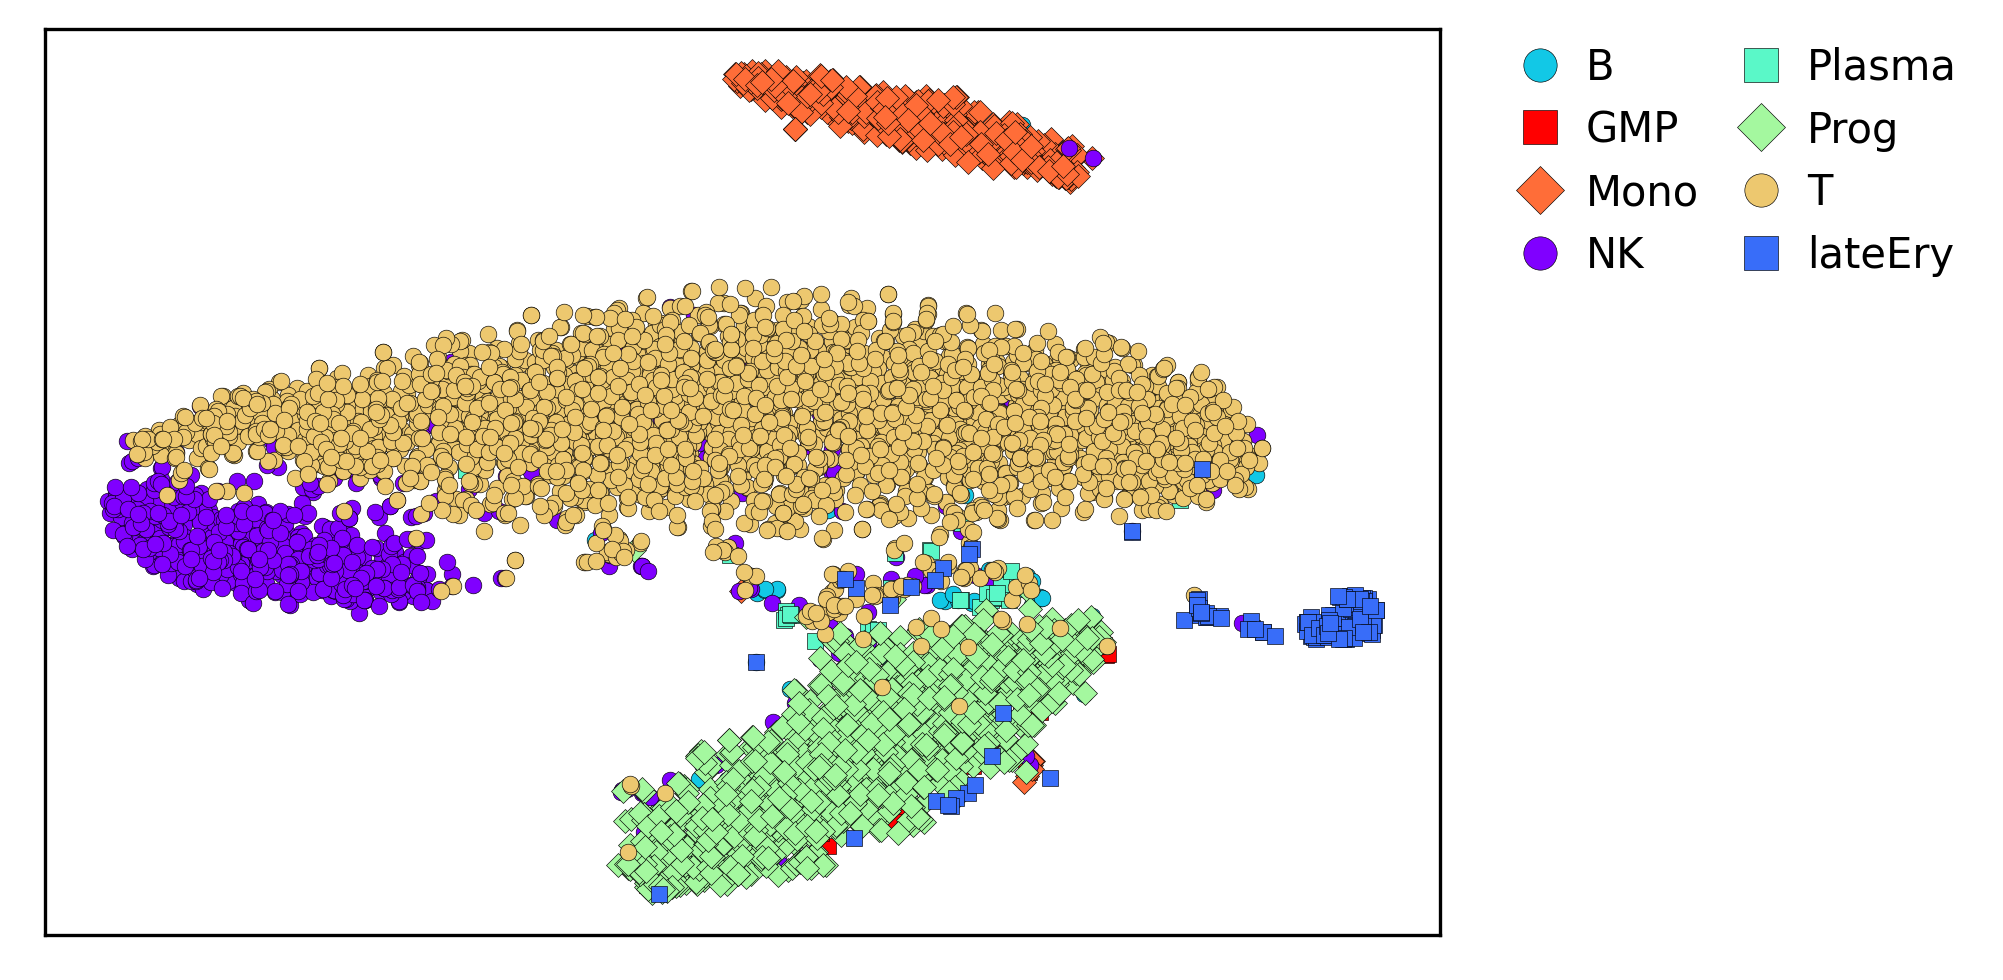

In [ ]:
myscatter(ed, cells_number, legend=True)

In [ ]:
centers, labels = get_centers(np.array(h), mode="louvain", n_cluster=7)
myscatter(ed,labels, legend=True)

In [ ]:
autoencoder.clustering_train(centers, h, wc=5, max_epoch=20)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.0233466625213623 seconds
Jaccard graph constructed in 1.869598388671875 seconds
Wrote graph to binary file in 0.10440444946289062 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.788798
After 2 runs, maximum modularity is Q = 0.794083
After 3 runs, maximum modularity is Q = 0.795677
After 4 runs, maximum modularity is Q = 0.797771
Louvain completed 24 runs in 4.528347015380859 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 7.6906349658966064 seconds


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


tf.Tensor(1.5329866, shape=(), dtype=float32)
tf.Tensor(0.28090057, shape=(), dtype=float32)
tf.Tensor(1.6315881, shape=(), dtype=float32)
tf.Tensor(0.3007553, shape=(), dtype=float32)
Finish!


In [ ]:
autoencoder.weights

In [ ]:
h = autoencoder.encoder(x_train)

In [ ]:
ed = tsne(h)

<AxesSubplot: >

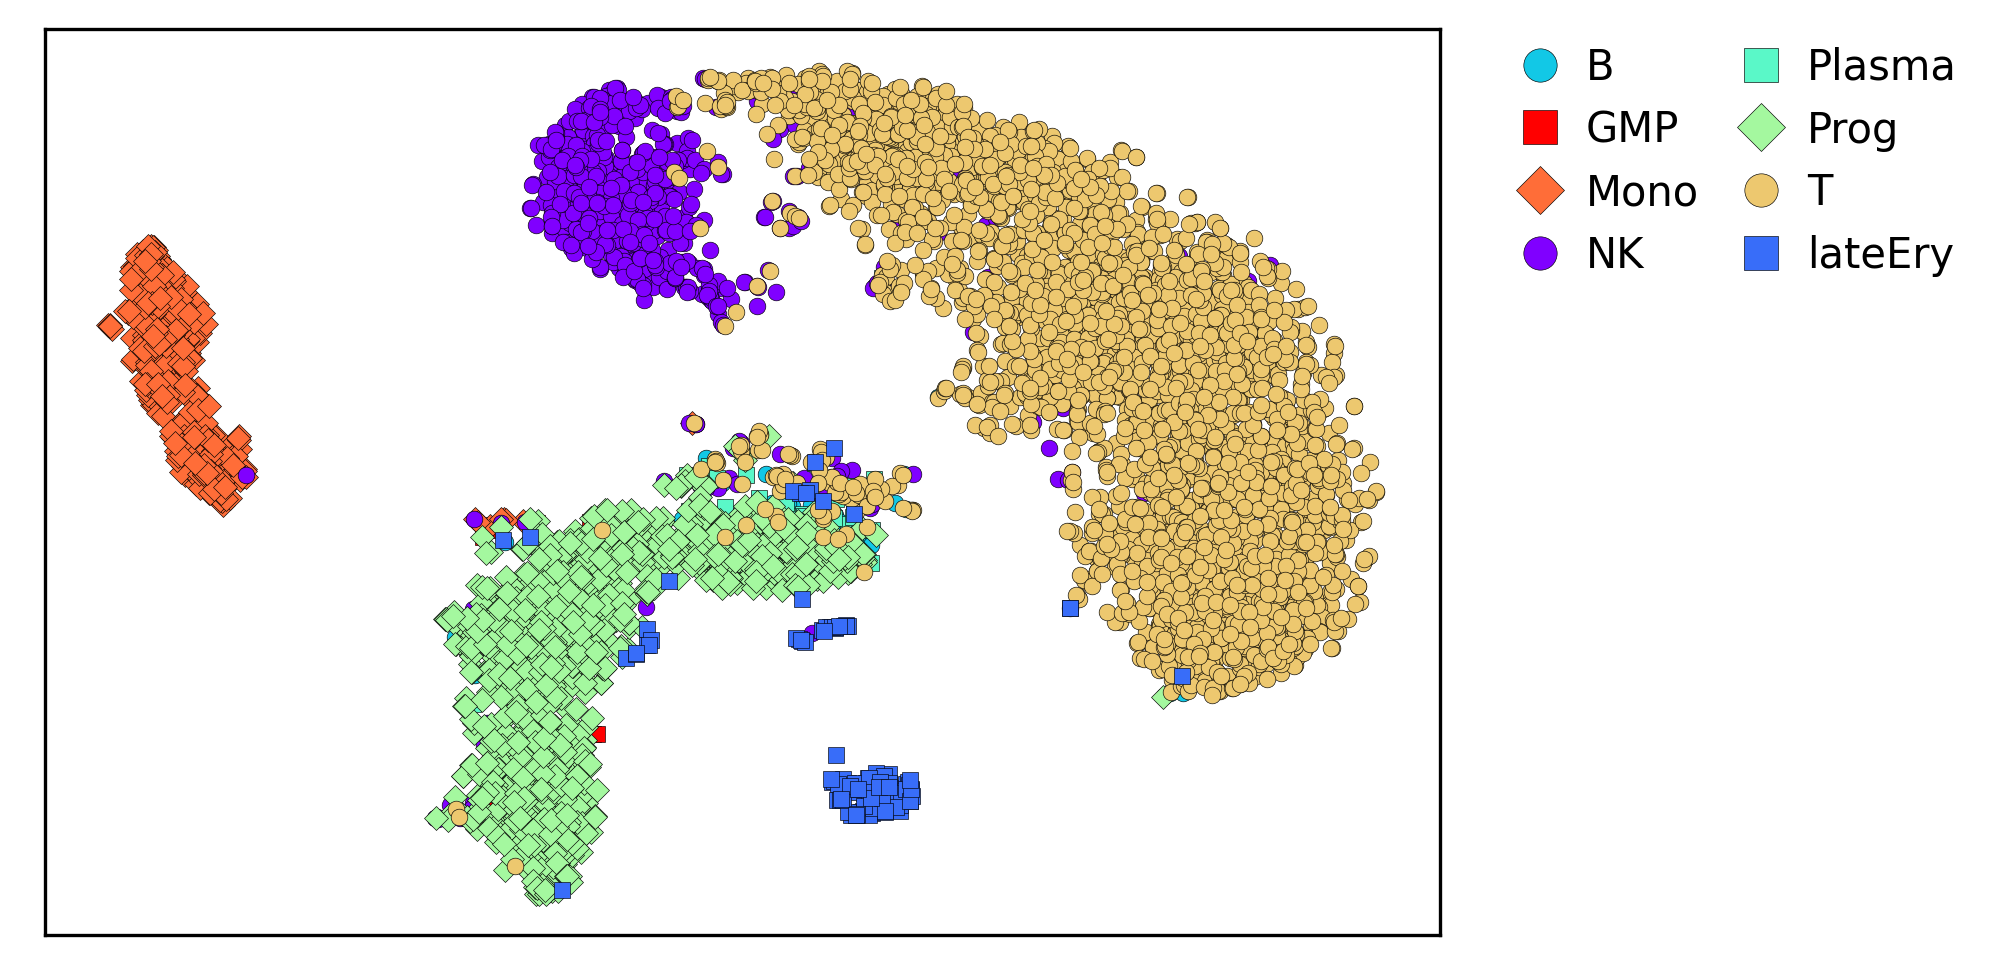

In [ ]:
myscatter(ed, cells_number, legend=True)

In [ ]:
ed = tsne(count) #n
myscatter(ed, cells_number, legend=True)

In [ ]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, homogeneity_score, completeness_score
def measure(true, pred):
    NMI = round(normalized_mutual_info_score(true, pred), 2)
    RAND = round(adjusted_rand_score(true, pred), 2)
    HOMO = round(homogeneity_score(true, pred), 2)
    COMP = round(completeness_score(true, pred), 2)
    return [NMI, RAND, HOMO, COMP]

In [ ]:
labels_new, _,  _ = phenograph.cluster(np.array(h))
#measure(cells_number, labels_new)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.7919290065765381 seconds
Jaccard graph constructed in 2.990891218185425 seconds
Wrote graph to binary file in 0.1967945098876953 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.84914
After 2 runs, maximum modularity is Q = 0.851946
Louvain completed 22 runs in 4.836897373199463 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 8.99960708618164 seconds


<AxesSubplot: >

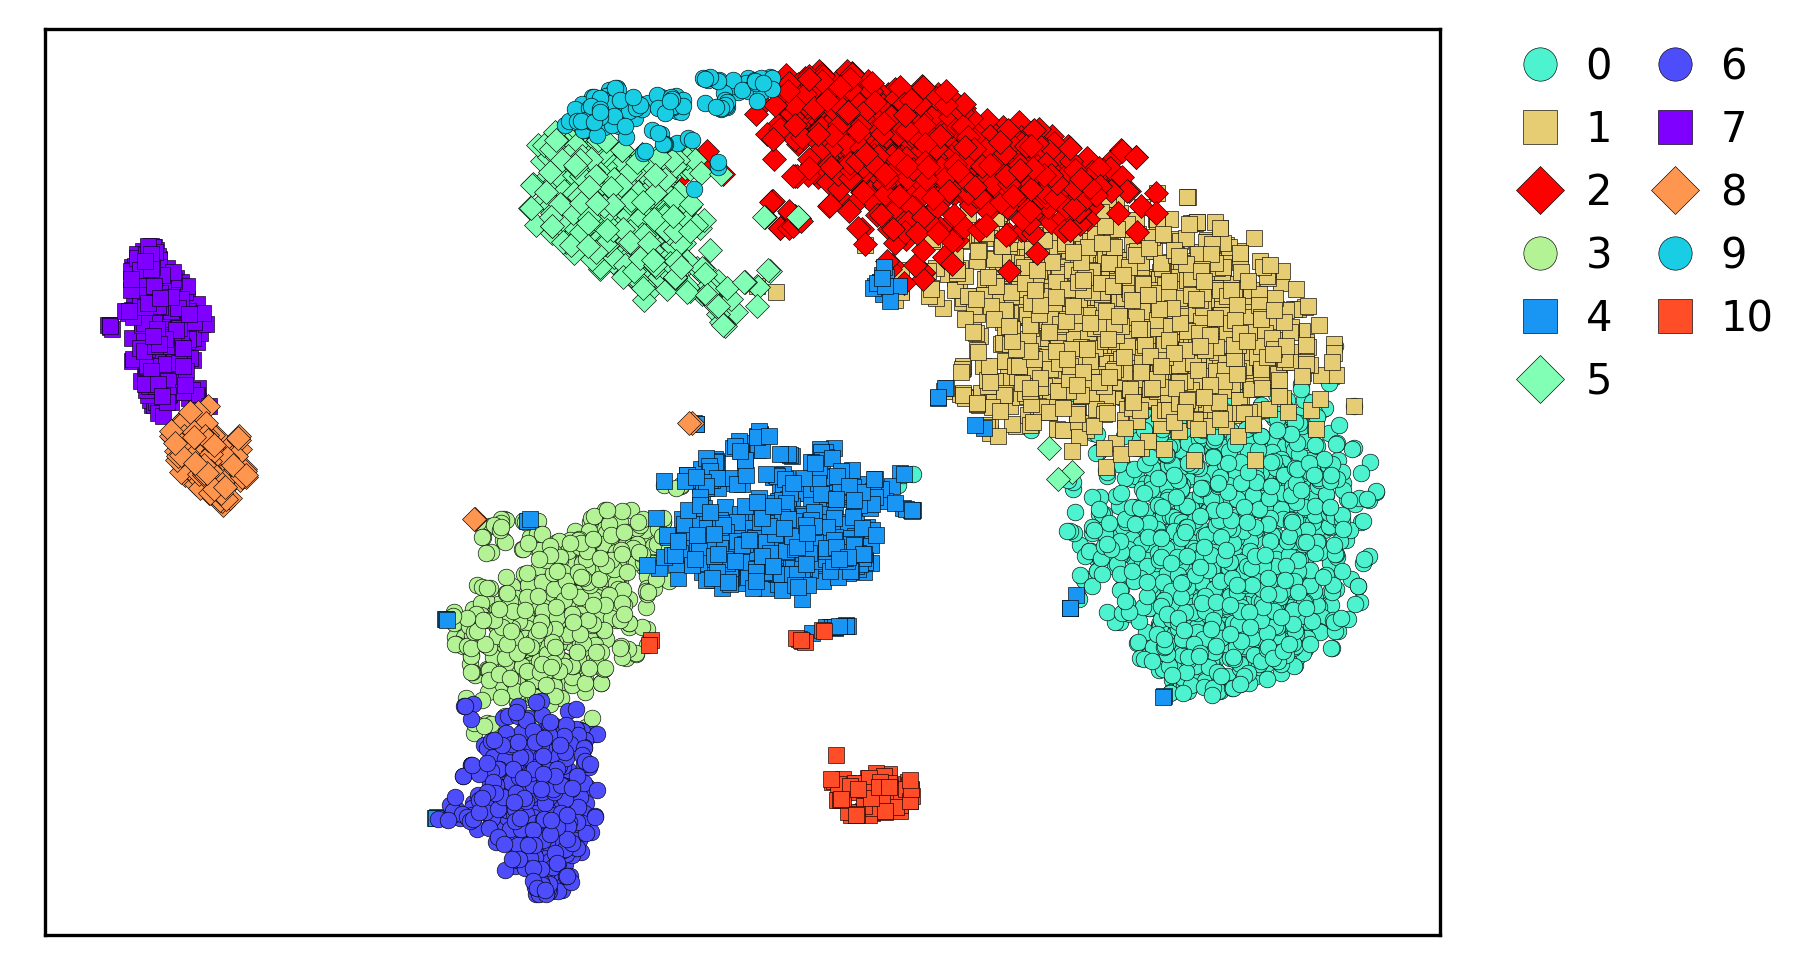

In [ ]:
myscatter(ed, labels_new, legend=True)

In [ ]:
labels_new = KMeans(n_clusters=10, random_state=0).fit(np.array(h)).labels_
measure(cells_number, labels)

In [ ]:
myscatter(ed,labels_new, legend=True)

In [ ]:
save = pd.DataFrame(dist_mat)
save.to_csv('/content/drive/My Drive/RNN/AML7075-all_dist.csv',index=False,header=True)

In [ ]:
cells_label

In [ ]:
myscatter(ed,cells_label)

In [ ]:
save = pd.DataFrame(cf_matrix)
save.to_csv('/content/drive/My Drive/RNN/AML7075-all_matrix.csv',index=False,header=True)

In [ ]:
save = pd.DataFrame(labels_new)
save.to_csv('/content/drive/My Drive/RNN/AML707B_predict.csv',index=False,header=True)

In [ ]:
save = pd.DataFrame(ed)
save.to_csv('/content/drive/My Drive/RNN/AML707B_cluster.csv',index=False,header=True)

In [ ]:
print(type(cells_number)

In [ ]:
from scipy.spatial.distance import cdist
dist_mat = cdist(h, h, 'euclidean')

In [ ]:
y_test = cells_number
y_pred = labels_new

In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')


ax.set_title('seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted cells Category')
ax.set_ylabel('Actual cells Category');
##Ticker labels-List must be in alphabetical order
ax.xaxis.set_ticklabels(['D0','D41','D113','D18','D91'])
ax.yaxis.set_ticklabels(['D0','D41','D113','D18','D91'])

##Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)